In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes = True)


In [4]:
client = pd.read_csv("/content/client_data (1).csv")
price = pd.read_csv("/content/price_data (1).csv")

In [5]:
client.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client.describe()


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
client.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,count
id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.116900,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0,1
ab250252dfaded1c9a54834f9c829b43,lmkebamcaaclubfxadlmueccxoimlema,3550287,1401366,386468,2011-11-24,2016-11-24,2011-11-24,2015-11-25,5266.37,5654,0.0,131.38,0.112922,0.097810,40.606701,t,502.29,1.83,1.83,2,565.32,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,27.900,0,1
ab32c3a8d93c88b485499566526cb34d,foosdfpfkusacimwkcsosbicdxkicaua,8258,0,1545,2009-03-10,2016-03-10,2009-03-10,2015-03-11,1237.34,1545,0.0,0.00,0.145884,0.000000,44.311378,f,227.71,30.22,30.22,1,115.57,7,ldkssxwpmemidmecebumciepifcamkci,13.200,0,1
ab3392ec2bfd3605624f31d3c6828c21,foosdfpfkusacimwkcsosbicdxkicaua,23923,0,1844,2010-05-01,2016-04-30,2010-05-01,2015-05-01,2437.39,1844,0.0,135.32,0.115174,0.098837,40.606701,f,184.26,21.76,21.76,1,265.37,6,lxidpiddsbxsbosboudacockeimpuepw,18.000,0,1
ab346731fef5aa291919ea43e45af5a7,foosdfpfkusacimwkcsosbicdxkicaua,10441,0,913,2012-04-03,2016-04-03,2012-04-03,2015-04-04,1052.81,913,0.0,132.92,0.116910,0.100572,40.606701,f,89.14,28.08,28.08,1,127.63,4,lxidpiddsbxsbosboudacockeimpuepw,17.321,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55091aace7bd0fadd194f46cb4886fea,foosdfpfkusacimwkcsosbicdxkicaua,20459,0,1934,2010-10-06,2017-01-13,2015-01-13,2016-01-14,172.14,119,0.0,146.96,0.145677,0.125383,41.769863,f,14.58,69.24,69.24,1,67.28,5,lxidpiddsbxsbosboudacockeimpuepw,17.320,0,1
550b8d2f9c298abd8f05fca3bc1a13c4,foosdfpfkusacimwkcsosbicdxkicaua,34053,0,0,2011-12-22,2016-12-22,2015-11-01,2015-12-23,4178.75,0,0.0,1.45,0.165025,0.086381,44.311378,f,0.00,6.15,6.15,1,281.06,4,lxidpiddsbxsbosboudacockeimpuepw,13.164,0,1
5514b18508f378a39f41657554aa72e3,foosdfpfkusacimwkcsosbicdxkicaua,57811,0,8626,2012-07-27,2016-09-17,2015-09-17,2015-07-28,2763.33,1916,0.0,168.78,0.156727,0.134578,41.105201,f,243.67,142.07,142.07,1,1193.99,4,lxidpiddsbxsbosboudacockeimpuepw,65.000,0,1


In [14]:
price.value_counts()

id                                price_date  price_off_peak_var  price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix
0002203ffbb812588b632b9e628cc38d  2015-01-01  0.126098            0.103975        0.070232            40.565969           24.339581       16.226389             1
ab3dea5cf349abfa77161a8cb1f1e662  2015-03-01  0.127710            0.105130        0.073270            40.565969           24.339581       16.226389             1
ab346731fef5aa291919ea43e45af5a7  2015-06-01  0.128077            0.106401        0.076311            40.728885           24.437330       16.291555             1
                                  2015-07-01  0.128077            0.106401        0.076311            40.728885           24.437330       16.291555             1
                                  2015-08-01  0.119916            0.102232        0.076257            40.728885           24.437330       16.291555             1
                                                                                                                                                               ..
5499495e4fa4d286be7d7d3714bd3048  2015-04-01  0.123086            0.100505        0.068646            40.565969           24.339581       16.226389             1
                                  2015-05-01  0.123086            0.100505        0.068646            40.565973           24.339578       16.226383             1
                                  2015-06-01  0.123086            0.100505        0.068646            40.565973           24.339578       16.226383             1
                                  2015-07-01  0.123086            0.100505        0.068646            40.565973           24.339578       16.226383             1
ffff7fa066f1fb305ae285bb03bf325a  2015-12-01  0.119916            0.102232        0.076257            40.728885           24.437330       16.291555             1
Name: count, Length: 193002, dtype: int64

In [16]:
client.isnull().sum()

,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


In [18]:
price.isnull().sum()

,0
id,0
price_date,0
price_off_peak_var,0
price_peak_var,0
price_mid_peak_var,0
price_off_peak_fix,0
price_peak_fix,0
price_mid_peak_fix,0


In [19]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

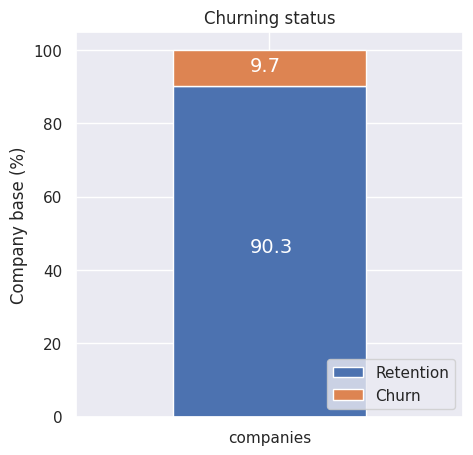

In [24]:
churn = client[['id' , 'churn']]
churn.columns = ['companies' , 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total/churn_total.sum() *100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

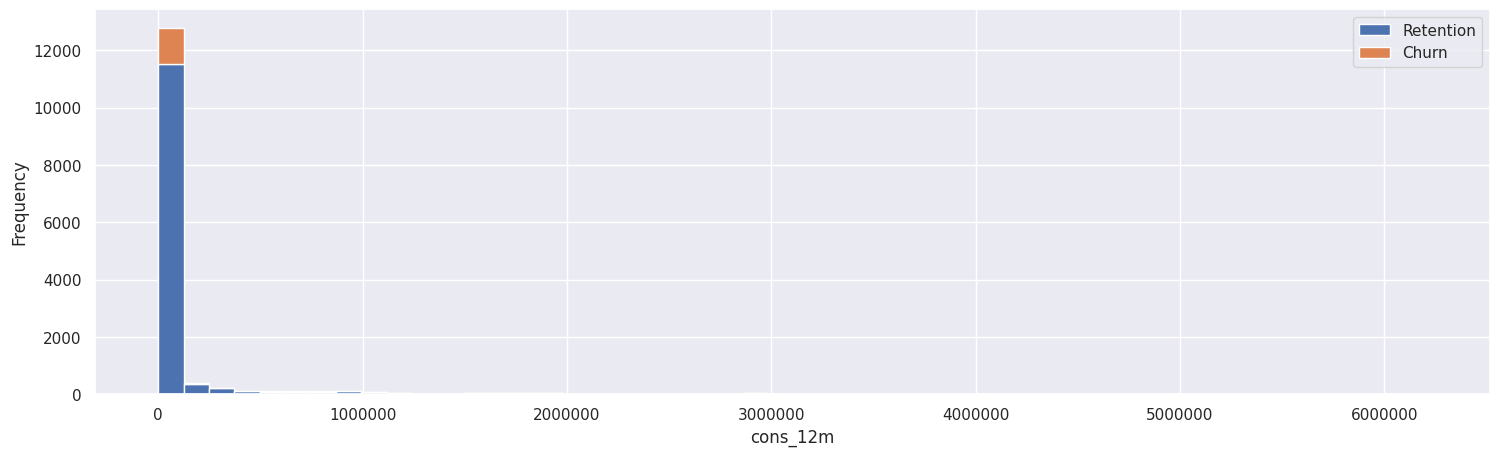

In [25]:
consumption = client[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)



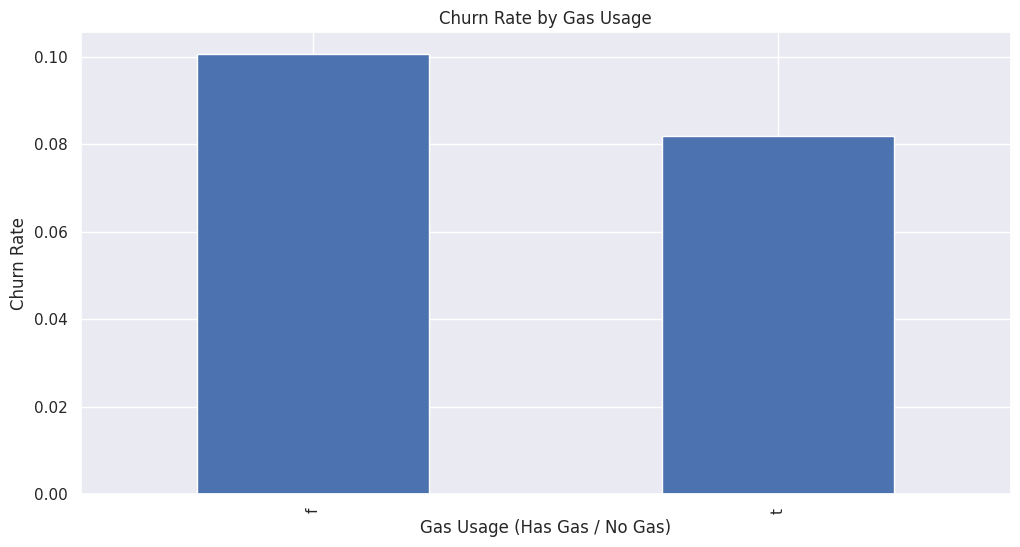

In [30]:
churn_by_gas = client.groupby('has_gas')['churn'].mean()
churn_by_gas.plot(kind='bar', figsize=(12, 6), title='Churn Rate by Gas Usage')
plt.ylabel('Churn Rate')
plt.xlabel('Gas Usage (Has Gas / No Gas)')
plt.show()

# comparying churn rates by companies that have gas and that do not



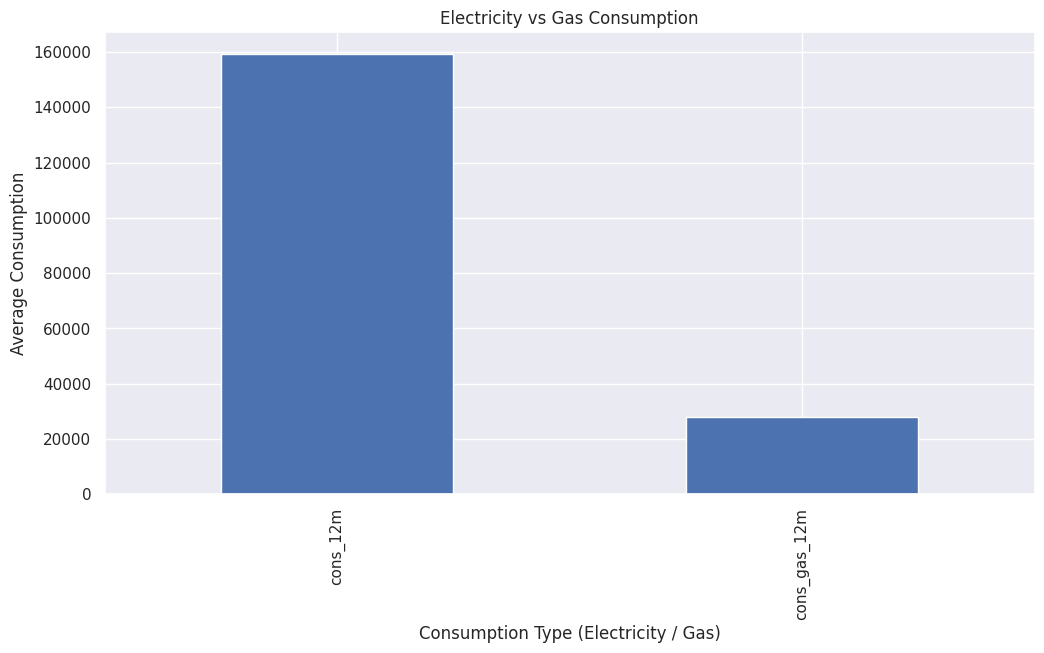

In [31]:
consumption_comparison = client[['cons_12m', 'cons_gas_12m']].mean()
consumption_comparison.plot(kind='bar', figsize=(12, 6), title='Electricity vs Gas Consumption')
plt.ylabel('Average Consumption')
plt.xlabel('Consumption Type (Electricity / Gas)')
plt.show()


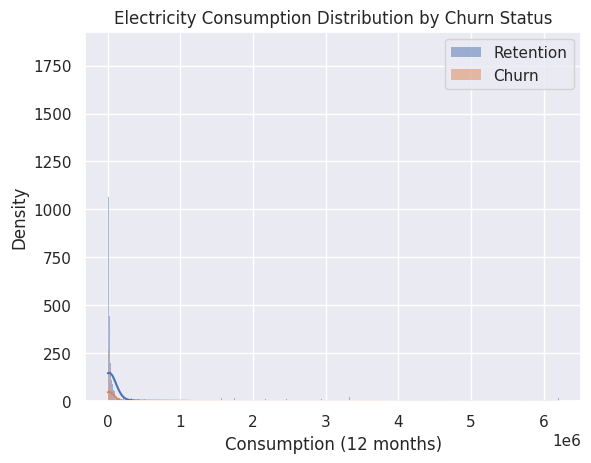

In [32]:
sns.histplot(client[client['churn'] == 0]['cons_12m'], label='Retention', kde=True)
sns.histplot(client[client['churn'] == 1]['cons_12m'], label='Churn', kde=True)
plt.title('Electricity Consumption Distribution by Churn Status')
plt.xlabel('Consumption (12 months)')
plt.ylabel('Density')
plt.legend()
plt.show()


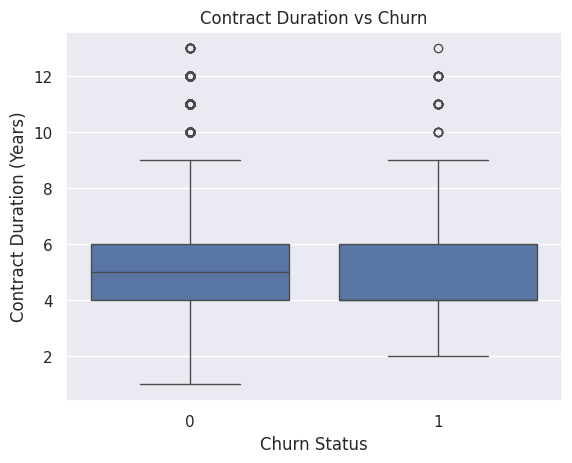

In [36]:
sns.boxplot(x='churn', y='num_years_antig', data=client)
plt.title('Contract Duration vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('Contract Duration (Years)')
plt.show()
